In [5]:
import numpy as np
import pandas as pd

import acquire

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
df = acquire.get_mallcustomer_data()

In [7]:
# from explore.py:
def train_validate_test_split(df, target, seed=1349):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    return train, validate, test

In [8]:
def scale_my_data(train, validate, test):
    scaler = MinMaxScaler()
    scaler.fit(train[['age', 'annual_income']])
    X_train_scaled = scaler.transform(train[['age', 'annual_income']])
    X_validate_scaled = scaler.transform(validate[['age', 'annual_income']])
    X_test_scaled = scaler.transform(test[['age', 'annual_income']])

    train[['age_scaled', 'income_scaled']] = X_train_scaled
    validate[['age_scaled', 'income_scaled']] = X_validate_scaled
    test[['age_scaled', 'income_scaled']] = X_test_scaled
    return train, validate, test

def prep_mall(df):
    '''
    dummy var for gender into is_male
    add 'spending_class' that cut spending score into the 4 quartiles and label the new field by [q1, q2, q3, q4]. 
    split on target of 'spending_score'
    scale age and annual income. 
    '''
    df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
    df = df.drop(columns=['gender'])
    df['spending_class'] = pd.qcut(df.spending_score, q=4, labels=['q1', 'q2', 'q3', 'q4'])
    train, validate, test = train_validate_test_split(df, target='spending_score', seed=1349)
    train, validate, test = scale_my_data(train, validate, test)
    return df, train, validate, test

df, train, validate, test = prep_mall(df)

**Goals of exploration**

- Can we see patterns, find signals in the data? 

- What features are driving the outcome?

- Are there other features we can construct that have stronger relationships? 

- Use Visualization and statistical testing to help answer these questions. 

- We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, for example).  

**Agenda**

- Wrangle data (acquire, prep, summarize, split)

- Identify questions to answer, hypotheses to test.

In [9]:
train.head()

,age,annual_income,spending_score,is_male,spending_class,age_scaled,income_scaled
customer_id,,,,,,,
27,45,28,32,0,q1,0.519231,0.106557
24,31,25,73,1,q3,0.250000,0.081967
40,20,37,75,0,q4,0.038462,0.180328
38,30,34,73,0,q3,0.230769,0.155738
57,51,44,50,0,q2,0.634615,0.237705


In [10]:
# in the scope of exploration:
# frame questions with our tools:
# univariate exploration
# bivariate exploration
# multivariate exploration

In [11]:
# 1. univariate exploration
# what are the distributions of each variable?

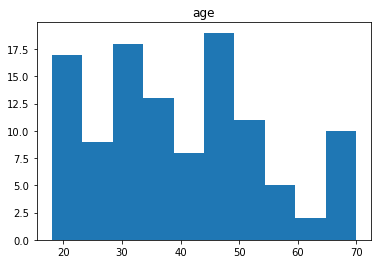

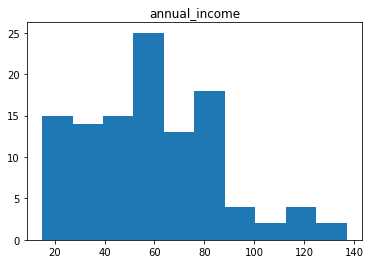

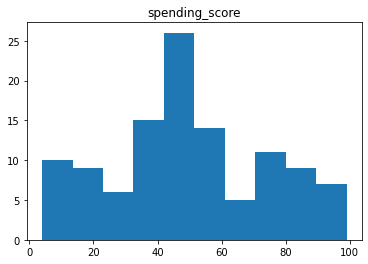

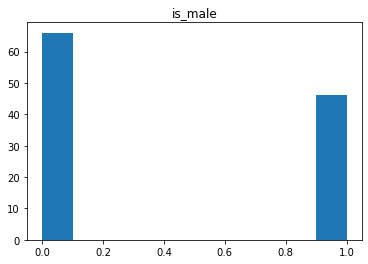

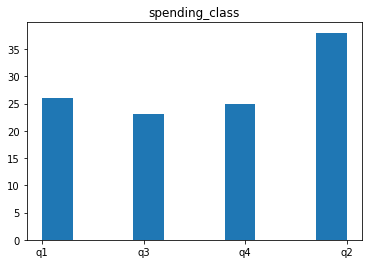

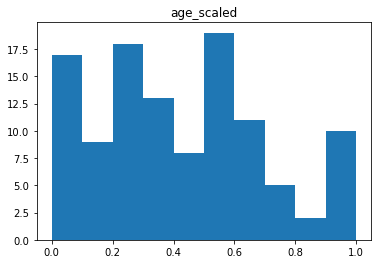

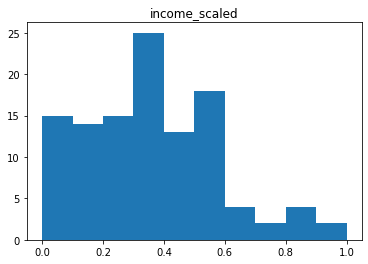

In [19]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [20]:
# notes:
# spending score looks mostly normal
# income and age appear to be skewed right
# note skew on age and income when binning
# slight class imbalance on is_male

In [ ]:
# Exploration:

# visualization for exploration should be fast and informative.
# it serves the purpose of elaborating on relationshis in your data and potential drivers of target variable

In [12]:
# 2. bivariate:
# Does spending score vary across gender?

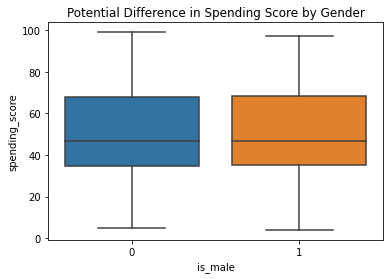

In [22]:
sns.boxplot(train.is_male, train.spending_score)
plt.title('Potential Difference in Spending Score by Gender')
plt.show()

In [23]:
# null hyothesis: mean_is_male == mean_not_male
# alt hypothesis: mean_is_male != mean_not_male
stats.levene(train[train.is_male==0].spending_score, train[train.is_male==1].spending_score)

LeveneResult(statistic=0.016334996444000886, pvalue=0.8985339363273774)

In [24]:
stats.ttest_ind(train[train.is_male==0].spending_score, train[train.is_male==1].spending_score, equal_var=True)

Ttest_indResult(statistic=0.2520372896728062, pvalue=0.8014825487089098)

In [13]:
# 3. bivariate:
# Is there a relationship between spending score and annual income?

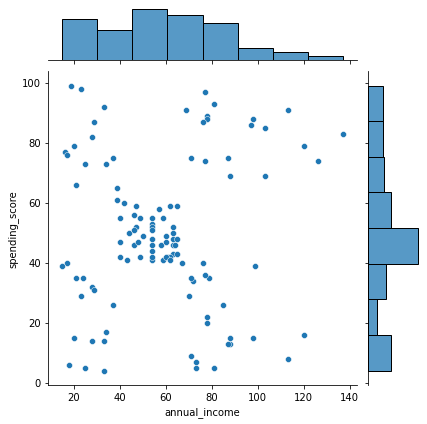

In [25]:
sns.jointplot(x='annual_income', y='spending_score', data=train)
plt.xlabel('Income')
plt.ylabel('Spending Score')
# plt.title('Relationship between Spending Score and Income')
plt.show()

In [14]:
# 4. bivariate:
# IS there a relationship between spending score and age?

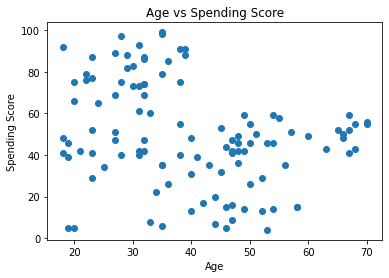

In [26]:
plt.scatter(train.age, train.spending_score)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()

In [27]:
train['age_bin'] = pd.cut(train.age, [0,40,80])

In [28]:
train.head()

,age,annual_income,spending_score,is_male,spending_class,age_scaled,income_scaled,age_bin
customer_id,,,,,,,,
27,45,28,32,0,q1,0.519231,0.106557,"(40, 80]"
24,31,25,73,1,q3,0.250000,0.081967,"(0, 40]"
40,20,37,75,0,q4,0.038462,0.180328,"(0, 40]"
38,30,34,73,0,q3,0.230769,0.155738,"(0, 40]"
57,51,44,50,0,q2,0.634615,0.237705,"(40, 80]"


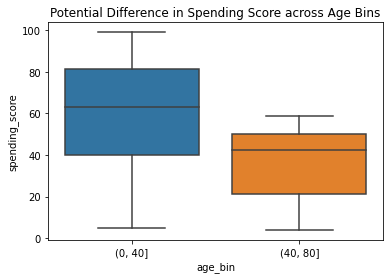

In [29]:
sns.boxplot(train.age_bin, train.spending_score)
plt.title('Potential Difference in Spending Score across Age Bins')
plt.show()

In [31]:
stats.levene(train[train.age<=40].spending_score, train[train.age > 40].spending_score)

LeveneResult(statistic=15.352912166943206, pvalue=0.00015525914569012802)

In [32]:
stats.ttest_ind(train[train.age<=40].spending_score, train[train.age > 40].spending_score, equal_var=False)

Ttest_indResult(statistic=5.292725484839427, pvalue=6.652618486151612e-07)

In [15]:
# 5. multivariate:
# If we control for age, does spending score differ across annual income?

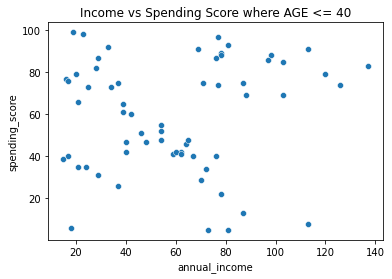

In [33]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age<=40])
plt.title('Income vs Spending Score where AGE <= 40')
plt.show()


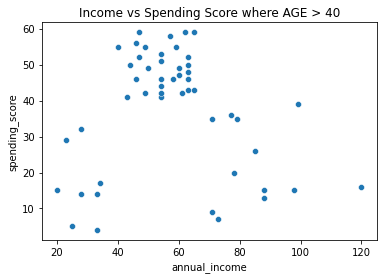

In [34]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age>40])
plt.title('Income vs Spending Score where AGE > 40')
plt.show()

In [ ]:
# 6. multivariate:
# if we control for income, does spending score differ across age?

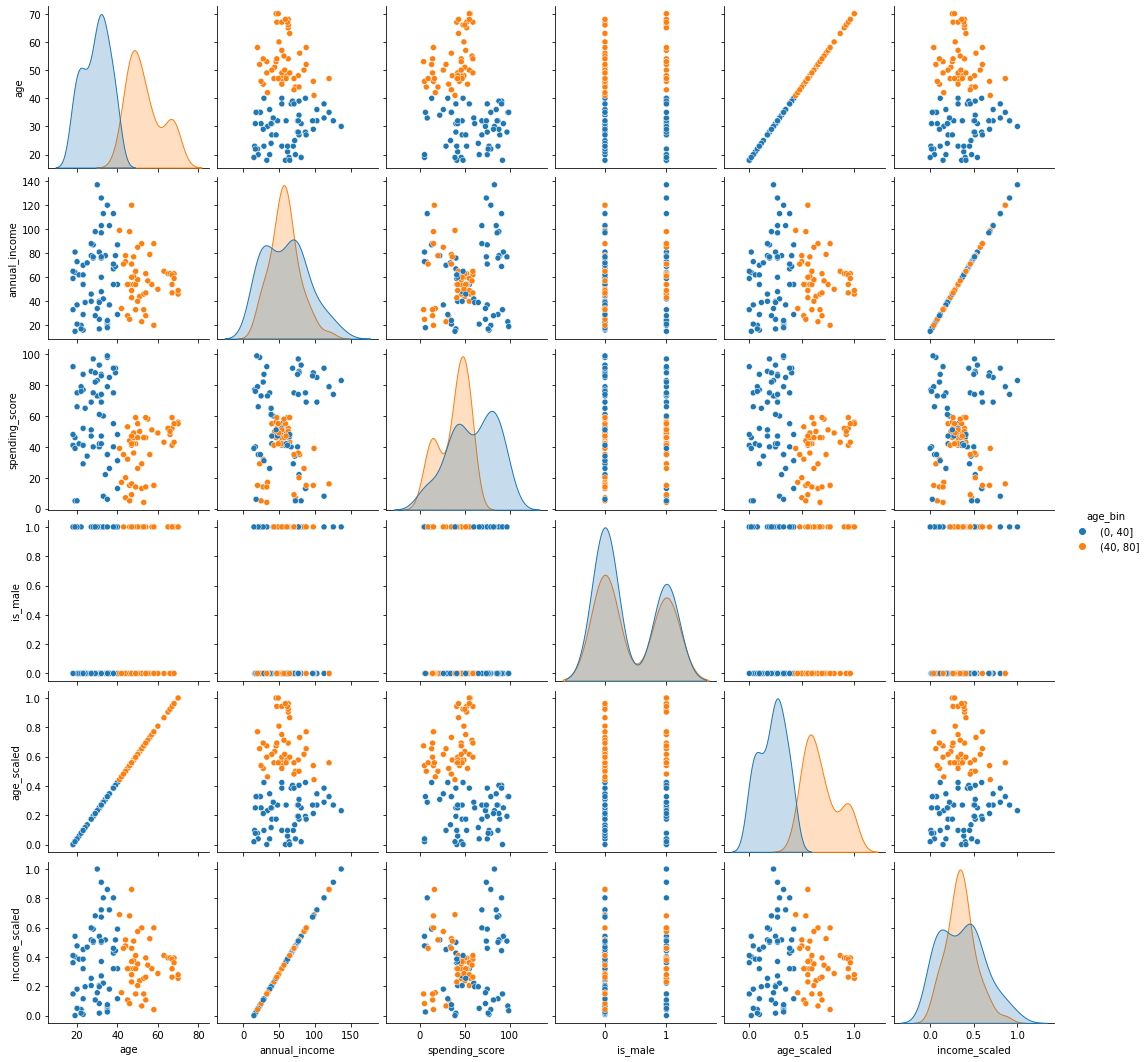

In [36]:
sns.pairplot(train, hue='age_bin')
plt.show()